In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import sqlite3
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [2]:
# getting data from an api of covid-19 cases
url = "https://api.covid19api.com/total/country/united-states"
headers = {
    'Authorization': "Basic ************************"}

response = requests.request("GET", url, headers=headers)
dat = response.json()
# saving data into a json file
with open("covid.json", 'w') as f:
    json.dump(dat, f)
print("Data has been saved as json file")

Data has been saved as json file


In [3]:
# Creating new database
db=sqlite3.connect('covid.sqlite')

In [4]:
# loading the json file back to python object
with open('covid.json', encoding='utf-8-sig') as json_file:
    json_data = json.loads(json_file.read())

In [5]:
#Aim of this block is to get the list of the columns in the JSON file.
columns = []
column = []
for data in json_data:
    column = list(data.keys())
    for col in column:
        if col not in columns:
            columns.append(col)
print("Column Names For Database:\n\n"+str(columns))

Column Names For Database:

['Country', 'CountryCode', 'Province', 'City', 'CityCode', 'Lat', 'Lon', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Date']


In [6]:
#Here we get values of the columns in the JSON file in the right order.   
value = []
values = [] 
for data in json_data:
    for i in columns:
        value.append((dict(data).get(i)))   
    values.append(list(value)) 
    value.clear()

In [7]:
#Time to generate the create and insert queries and apply it to the sqlite3 database       
create_query = "create table if not exists covid ({0})".format(",".join(columns))
insert_query = "insert into covid ({0}) values (?{1})".format(",".join(columns), ",?" * (len(columns)-1))      
c = db.cursor()   
c.execute(create_query)
c.executemany(insert_query , values)
values.clear()
db.commit()
print("Insert has completed") 

Insert has completed


In [8]:
# To Show all the data stored in out table
%load_ext sql
%sql sqlite:////users/ali/covid.sqlite
%sql SELECT * from covid;

 * sqlite:////users/ali/covid.sqlite
Done.


Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
United States of America,,,,,0,0,1,0,0,1,2020-01-22T00:00:00Z
United States of America,,,,,0,0,1,0,0,1,2020-01-23T00:00:00Z
United States of America,,,,,0,0,2,0,0,2,2020-01-24T00:00:00Z
United States of America,,,,,0,0,2,0,0,2,2020-01-25T00:00:00Z
United States of America,,,,,0,0,5,0,0,5,2020-01-26T00:00:00Z
United States of America,,,,,0,0,5,0,0,5,2020-01-27T00:00:00Z
United States of America,,,,,0,0,5,0,0,5,2020-01-28T00:00:00Z
United States of America,,,,,0,0,5,0,0,5,2020-01-29T00:00:00Z
United States of America,,,,,0,0,5,0,0,5,2020-01-30T00:00:00Z
United States of America,,,,,0,0,7,0,0,7,2020-01-31T00:00:00Z


In [9]:
# extracting data from the database using sql queries for the month of April and storing it in python object
col = "2020-05-%%T00:00:00Z"
c.execute("SELECT Confirmed,Deaths,Recovered,Date FROM covid WHERE Date LIKE ?",(col,))
all_rows = c.fetchall()
print(all_rows)

[(1103461, 64943, 164015, '2020-05-01T00:00:00Z'), (1132539, 66369, 175382, '2020-05-02T00:00:00Z'), (1158040, 67682, 180152, '2020-05-03T00:00:00Z'), (1180375, 68922, 187180, '2020-05-04T00:00:00Z'), (1204351, 71064, 189791, '2020-05-05T00:00:00Z'), (1228603, 73431, 189910, '2020-05-06T00:00:00Z'), (1257023, 75662, 195036, '2020-05-07T00:00:00Z'), (1283929, 77180, 198993, '2020-05-08T00:00:00Z'), (1309550, 78795, 212534, '2020-05-09T00:00:00Z'), (1329260, 79526, 216169, '2020-05-10T00:00:00Z'), (1347881, 80682, 232733, '2020-05-11T00:00:00Z'), (1369376, 82356, 230287, '2020-05-12T00:00:00Z'), (1390406, 84119, 243430, '2020-05-13T00:00:00Z'), (1417774, 85898, 246414, '2020-05-14T00:00:00Z'), (1442824, 87530, 250747, '2020-05-15T00:00:00Z'), (1467820, 88754, 268376, '2020-05-16T00:00:00Z'), (1486757, 89562, 272265, '2020-05-17T00:00:00Z'), (1508308, 90347, 283178, '2020-05-18T00:00:00Z'), (1528568, 91921, 289392, '2020-05-19T00:00:00Z'), (1551853, 93439, 294312, '2020-05-20T00:00:00Z'),

In [10]:
# calling out some empty lists to store data separately
confirmed = []
deaths = []
recovered = []
date = []

In [11]:
# getting data from the object obtained by sql query
for tup in all_rows:
    confirmed.append(tup[0])
    deaths.append(tup[1])
    recovered.append(tup[2])
    date.append(tup[3].split("T", maxsplit=9)[0].replace('-', ''))

In [12]:
print(len(confirmed))
print(len(deaths))
print(len(recovered))
print(len(date))

26
26
26
26


In [13]:
# this function is made to display graph of the data extracted from the database
def display_data(date, deaths, confirmed, recovered):    
    df = pd.DataFrame()
    x = np.arange(len(date))  # the label locations
    width = 0.25 # the width of the bars
    df['x'] = x
    fig, ax = plt.subplots()
    ax.bar(x-width, deaths, width,color='red', label='Deaths')
    ax.bar(x, recovered, width,color='green', label='Recovered')
    ax.bar(x+width, confirmed, width, color='orange', label='Confirmed')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Cases (Millions)')
    ax.set_title('Visual Representation of Data')
    ax.set_xticks(x)
    ax.set_xticklabels(date, rotation='vertical')
    ax.legend()
    fig.tight_layout()
    plt.show()

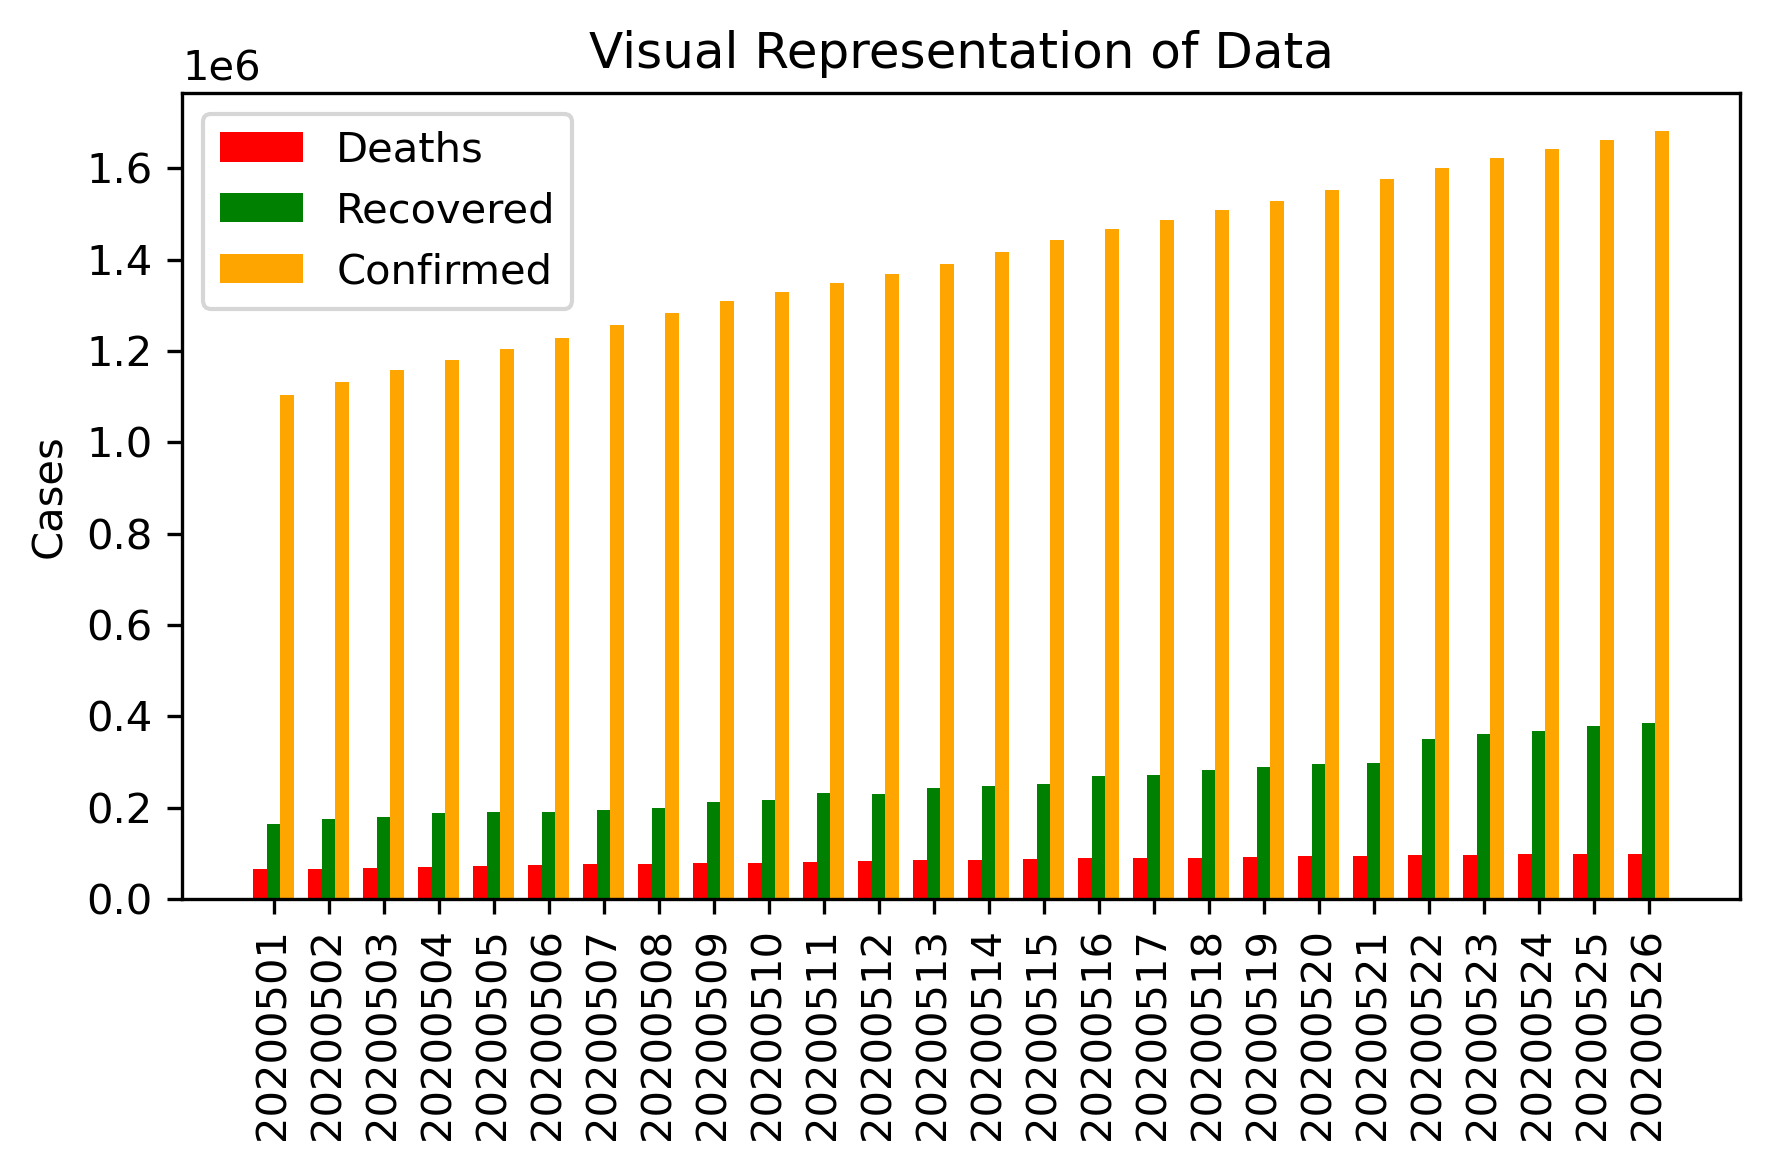

In [14]:
# calling out the display_data function
display_data(date, deaths, confirmed, recovered)